<a href="https://colab.research.google.com/github/kapilpriya01/priya-kapil/blob/master/Rf_DT/DecisionTreeandrandomForestQuestions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
# DECISION TREES AND RANDOM FOREST

Exploring publicly available data from __LendingClub.com__. Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.I am trying to create a model that will help predict people who have a profile of having a __high probability of paying back__.

Lending club had a very interesting year in __2016__. This data is from _before they even went public_.

I'm using lending data from __2007-2010__ and trying to classify and predict whether or not the borrower paid back their loan in full. The data is downloaded from here

Here are what the columns represent:
- __credit.policy:__ 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- __purpose:__ The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- __int.rate:__ The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- __installment:__ The monthly installments owed by the borrower if the loan is funded.
- __log.annual.inc:__ The natural log of the self-reported annual income of the borrower.
- __dti:__ The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- __fico:__ The FICO credit score of the borrower.
- __days.with.cr.line:__ The number of days the borrower has had a credit line.
- __revol.bal:__ The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- __revol.util:__ The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- __inq.last.6mths:__ The borrower's number of inquiries by creditors in the last 6 months.
- __delinq.2yrs:__ The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- __pub.rec:__ The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Load the data

In [1]:
import pandas as pd
loans = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
loans["not.fully.paid"].unique()

array([0, 1])

### Check the columns present in dataset

In [3]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Check the shape of dataset

In [4]:
loans.shape

(9578, 14)

### Check the descriptive statistics of dataset

In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Check the info of the dataset

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Q 1. Write a code to check if there is any missing values present in the dataset.

In [7]:
def tree():
    return loans.isnull().sum()
tree()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Data Visualisation

### Q 2. Plot a histogram of two FICO distribution on top of each other, one for each credit.policy

In [0]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


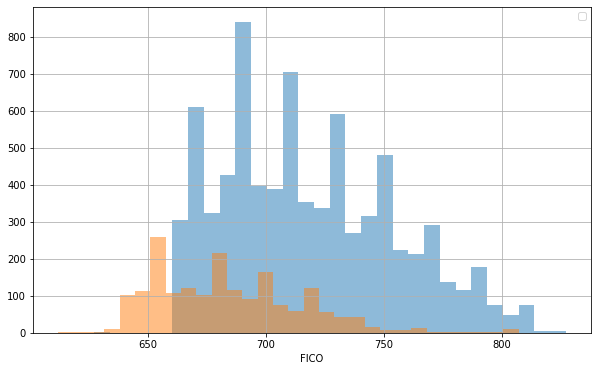

In [9]:
def tree():
    # set plot figure size
    plt.figure(figsize=(10,6))
    # code to create histogram for Credit.Policy=1 having alpha = 0.5, bins=30 and provide proper label
    loans[loans["credit.policy"]==1]['fico'].hist(alpha=0.5,bins = 30)
                                              
    # code to create histogram for Credit.Policy=0 having alpha = 0.5, bins=30 and provide proper label
    loans[loans["credit.policy"]==0]['fico'].hist(alpha=0.5,bins = 30)
                                              
    # provide legend
    plt.legend()
    # provide xlabel
    plt.xlabel("FICO")
tree()

### Q 3. Plot a histogram of two FICO distribution on top of each other, one for each not.fully.paid

No handles with labels found to put in legend.


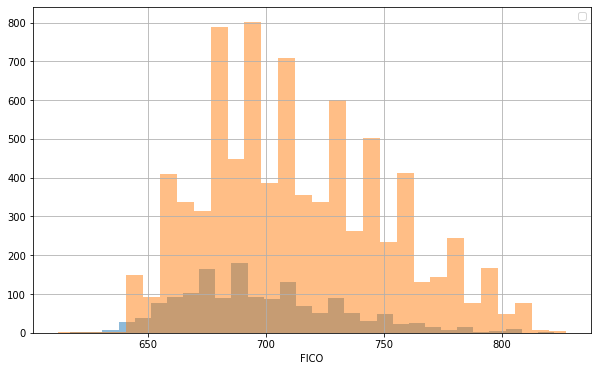

In [10]:
import matplotlib.pyplot as plt
def tree():
    # set plot figure size
    plt.figure(figsize=(10,6))
    # code to create histogram for not.fully.paid=1 having alpha = 0.5, bins=30 and provide proper label
    loans[loans["not.fully.paid"] == 1]["fico"].hist(alpha = 0.5, bins = 30)
                                              
    # code to create histogram for not.fully.paid=0 having alpha = 0.5, bins=30 and provide proper label
    loans[loans["not.fully.paid"] == 0]["fico"].hist(alpha = 0.5, bins = 30)
                                              
    # provide legend
    plt.legend()
    # provide xlabel
    plt.xlabel("FICO")
tree()

### Q 4. Using seaborn countplot show the counts of loans by purpose, with the color hue defined by not.fully.paid

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


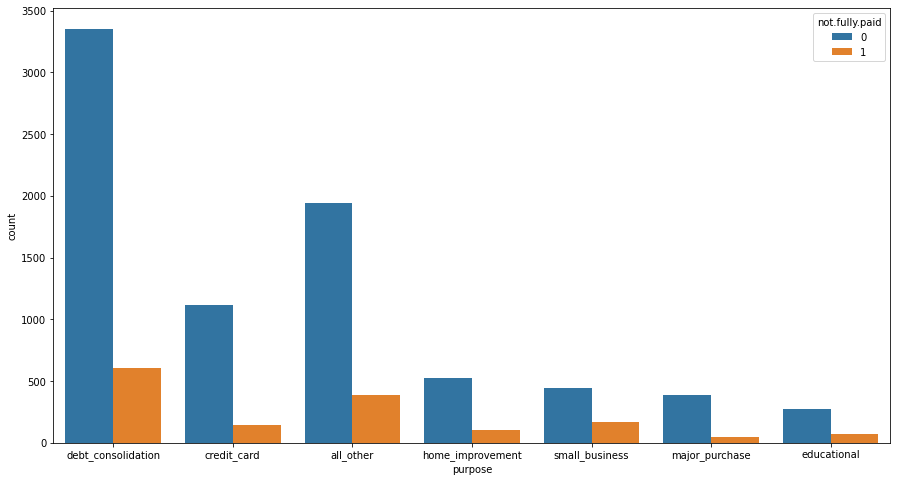

In [12]:
def tree():
    # set plot figure size
    plt.figure(figsize=(15,8))
    # your code to create the countplot
    sns.countplot(x="purpose", hue="not.fully.paid",data = loans)
tree()

### Q. 5 Using a seaborn countplot understand the trend between FICO score and interest rate

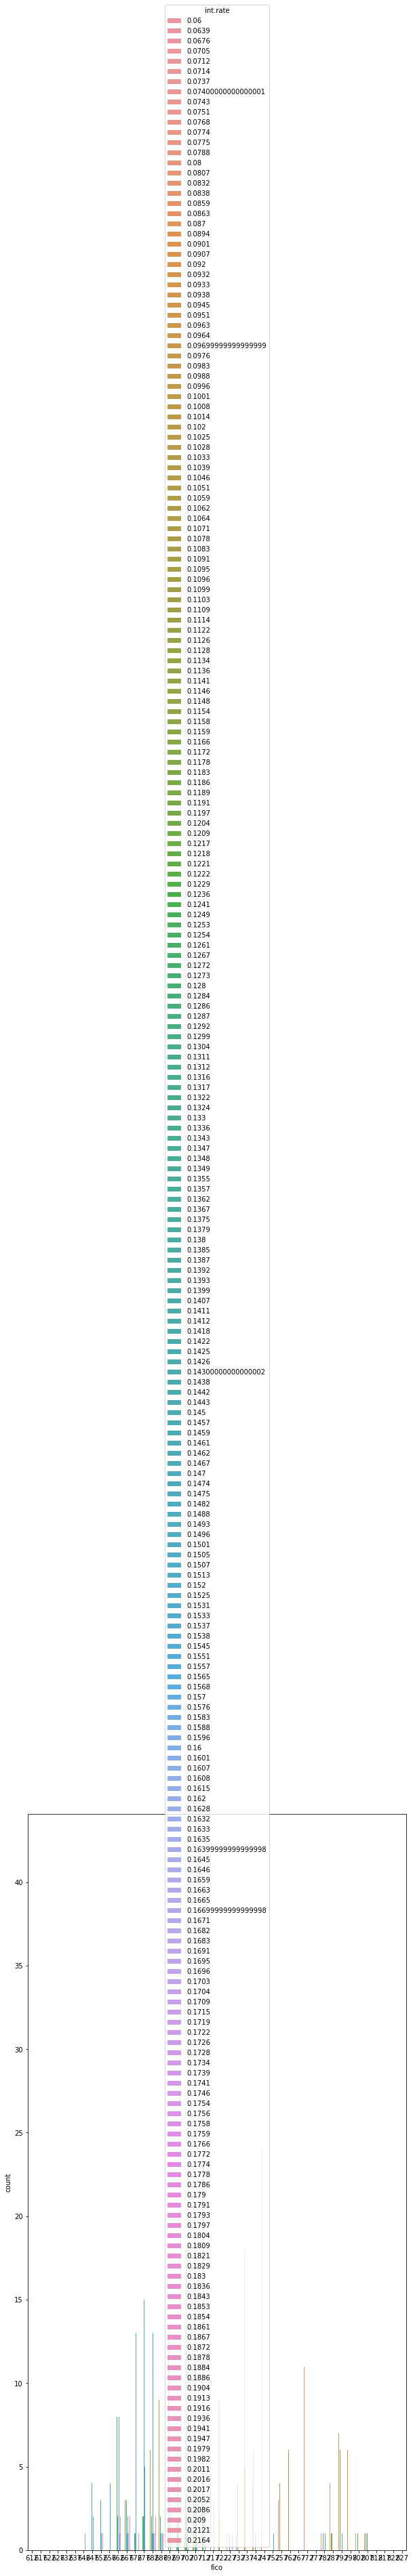

In [13]:
import seaborn as sns
def tree():
    # set plot figure size
    plt.figure(figsize = (10,20))
    # your code to create the countplot
    sns.countplot(data=loans, x = "fico", hue = "int.rate")
tree()

### Dealing with categorical variables.
``` ['purpose'] ```
- The purpose column is categorical. so transform them using dummy variables using pd.get_dummies.

In [0]:
cat_feats = ['purpose']

### Q 6. Using pd.get_dummies create a fixed larger dataframe that has new feature columns with dummy variables.

In [15]:
final_data = pd.DataFrame()
def tree():
    # create a new data frame final data with dummies of the categorical variables
    final_data = pd.get_dummies(data = loans, columns = cat_feats, drop_first=True)
    return final_data
final_data = tree()
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Q 7. Extract the independent column to prepare X

In [17]:
X = pd.DataFrame()
def tree():
    # create new dataframe X having all the independent variables
    X = final_data.loc[: ,final_data.columns != "not.fully.paid"]
    return X
X = tree()
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


### Q 8. Extract dependent column into a dataframe y for model prediction

In [18]:
y = pd.DataFrame()
def tree():
     # create new dataframe y having the dependebt variable
     y = final_data["not.fully.paid"]
     return y
y = tree()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

### Q 9. Split X and y into train and test dataset

In [0]:
from sklearn.model_selection import train_test_split
#using train_test_split, split the data into train and test in the ration 70:30 respectively.

In [0]:
def tree():
    return train_test_split(X,y,random_state = 1, test_size = 0.3)
X_train, X_test, y_train, y_test = tree()

### Check the shape of X and y of train dataset

In [21]:
def tree():
    print(X_train.shape)
    print(y_train.shape)
tree()

(6704, 18)
(6704,)


### Check the shape of X and y of test dataset

In [26]:
def tree():
    print(X_test.shape)
    print(y_test.shape)
tree()

(2874, 18)
(2874,)


### Q 10. Instantiate Decision Tree Classifier using scikit learn

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
def tree():
    # initate the DecisionTreeClasifier as dtree.
    dtree = DecisionTreeClassifier()
    return dtree
dtree = tree()

### Q 11. Fit the model on X_train and y_train

In [29]:
def tree():
    return dtree.fit(X_train,y_train)
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Q 12. Using the model for prediciton

In [0]:
predictions = pd.DataFrame()
def tree():
    # use the model for prediction and assign it to predictions
    predictions = dtree.predict(X_test)
    return predictions
predictions = tree()

In [31]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

### Q 13. Model evaluation using Confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix

In [34]:
def tree():
    #Compute and print the confusion matrix

    print(confusion_matrix(y_test,predictions))
tree()

[[1990  407]
 [ 378   99]]


### Q 14. Model evaluation using recall score

In [0]:
from sklearn.metrics import recall_score

In [36]:
def log():
    # compute the recall score as recall1
    recall1 = recall_score(y_test,predictions)
    # your code to print the recall1 scoreprint('Recall score for test data is:', recall1)
    print(('Recall score for test data is:', recall1))
    return recall1
recall1 = log()

('Recall score for test data is:', 0.20754716981132076)


### Q 15. Model evaluation using classification report.
- Please refer the link for Classification report documentation - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [0]:
from sklearn.metrics import classification_report

In [41]:
def tree():
    # COmpute and print the classification report
    print (classification_report(y_test,predictions))
tree()

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2397
           1       0.20      0.21      0.20       477

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.73      0.73      0.73      2874



### Q 16. Instantiate Decision Tree Classifer using sikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4).
- Please refer the link for DecisionTreeClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [0]:
def tree():
    # instantiate Decision tree classifier as dtree1 with the above mentioned parameters
    dtree1 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10, max_depth= 3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = tree()

### 16.1 Fit the model X_train and y_train

In [49]:
def tree():
    return dtree1.fit(X_train,y_train) # the fitted model on X_train and y_train
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 16.2 Use the model for prediction

In [0]:
predictions_new = pd.DataFrame()
def tree():
    # use the model for prediction and assign it to predeictions_new
    predictions_new = dtree1.predict(X_test)
    return predictions_new
predictions_new = tree()

### 16.3 Model evaluation using Confusion matrix

In [53]:
def tree():
    # Compute and print the confusion matrix
    print(confusion_matrix(y_test,predictions_new))
tree()

[[2397    0]
 [ 477    0]]


### 16.4 Model evaluation using recall score

In [54]:
from sklearn.metrics import recall_score
def log():
    # Compute the recall score as recall2
    recall2 = recall_score(y_test,predictions_new)
    # print the recall score for the recall2
    print(recall2)
    return recall2
recall2 = log()

0.0


### 16.5 Model evaluation using classification report

In [55]:
def tree():
    # Compute and print the classification report
    print (classification_report(y_test,predictions_new))
tree()

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.00      0.00      0.00       477

    accuracy                           0.83      2874
   macro avg       0.42      0.50      0.45      2874
weighted avg       0.70      0.83      0.76      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q 17. Write a code to find the difference between the recall score of 2 Decision Tree models created above ( Give the absolute value).

In [56]:
def log():
    # Compute the difference between recall1 and recall2
    return recall2-recall1# the difference value
log()

-0.20754716981132076

## Random Forest Model

### Q 18. Instantiate Random Forest Classifier using scikit learn having n_estimators = 600.

In [0]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    # instantiate the random forest classifier and assign it to rfc
    rfc = RandomForestClassifier(n_estimators = 600)
    return rfc
rfc = rf()

### Q 19. Fit the model on X_train and y_train

In [58]:
def rf():
    return rfc.fit(X_train,y_train) # the fitted model on X_train and y_train
rf()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Q 20. Using the model for prediction

In [0]:
predictions1 = pd.DataFrame()
def rf():
    # use the model for predictions and assign it to predictions1
    predictions1 = rfc.predict (X_test)
    return predictions1
predictions1 = rf()

### Q 21. Model evaluation using Confusion matrix 

In [61]:
def rf():
    # COmpute and print the confusion matrix
    print(confusion_matrix(y_test,predictions1))
rf()

[[2390    7]
 [ 471    6]]


### Q 22. Model evaluation using recall score

In [63]:
from sklearn.metrics import recall_score
def log():
    # Compute the recall score and assign it to recall_rfc
    recall_rfc = recall_score(y_test,predictions1)
    # print the recall_rfc
    print(recall_rfc)
    return recall_rfc
recall_rfc = log()

0.012578616352201259


### Q 23. Model evaluation using Classification report.

In [64]:
def rf():
    # Compute and print classification report
    print(classification_report(y_test,predictions1))
rf()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2397
           1       0.46      0.01      0.02       477

    accuracy                           0.83      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.77      0.83      0.76      2874



### Q 24. Instantitate Random Forest Model using scikit learn having (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5).
- Pleae refer the link for RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
def rf():
    # instantiate the random forest classifier as rfc_new using all the parameters mentioned above
    rfc_new = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state=0, max_depth=2, min_impurity_split=4, min_samples_leaf=3, max_leaf_nodes=5)
    return rfc_new
rfc_new = rf()

### 24.1 Fit the model on X_train and y_train

In [67]:
def rf():
    return rfc_new.fit(X_train,y_train) # the fiited model on X_train and y_train
rf()

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=4,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 24.2 Using the model for prediction

In [0]:
new_predictions = pd.DataFrame()
def rf():
    # using the model for predictions and assign it to new_predictions
    new_predictions = rfc_new.predict(X_test)
    return new_predictions
new_predictions = rf()

### 24.3 Model evaluation using Confusion Matrix

In [69]:
def rf():
    # Compute and print the confusion matrix
    print(confusion_matrix(y_test,new_predictions))
rf()

[[2397    0]
 [ 477    0]]


### 24.4 Model evaluation using recall score

In [70]:
from sklearn.metrics import recall_score
def log():
    # Compute the recall_score as recall_rfc1
    recall_rfc1 = recall_score(y_test,new_predictions)
    # printt the recall score
    print(recall_rfc1)
    return recall_rfc1
recall_rfc1 = log()

0.0


### 24.5 Model evaluation using Classification report

In [71]:
def rf():
    # Compute and print the classification report
    print(classification_report(y_test,new_predictions))
rf()

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.00      0.00      0.00       477

    accuracy                           0.83      2874
   macro avg       0.42      0.50      0.45      2874
weighted avg       0.70      0.83      0.76      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q 25. Write a code to understand the difference between the recall score of the above 2 Random Forest models (Give the absolute value).

In [72]:
def log():
    # Calculate the difference between recall_rfc and recall_rfc1
    return recall_rfc-recall_rfc1 # the difference value
log()

0.012578616352201259

In [73]:
rfc_new.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])